In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [1]:
#files.upload()

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [03:28<00:00, 32.3MB/s]
100% 6.31G/6.31G [03:28<00:00, 32.5MB/s]


Histopathologic Cancer Detection is an important task in medical imaging that aims to identify and classify cancerous cells from tissue samples. Due to the complexity and variability of tissue samples, this task requires advanced machine learning techniques, such as convolutional neural networks (CNNs). CNNs are a type of neural network that are specifically designed for image processing tasks, such as object detection, image classification, and segmentation. They use a series of convolutional layers to extract features from the input image and learn to classify these features into different classes. In the case of Histopathologic Cancer Detection, CNNs can be trained to accurately identify cancerous cells from tissue samples, making them a valuable tool for early cancer detection and diagnosis.

In [8]:
import zipfile

zip = zipfile.ZipFile('histopathologic-cancer-detection.zip')

zip.extractall()

In [9]:
import os

path = 'train_labels.csv'

if os.access(path, os.R_OK):
    print('File is readable')
else:
    print('File is not readable')
    
if os.access(path, os.W_OK):
    print('File is writable')
else:
    print('File is not writable')


File is readable
File is writable


**EDA-Exploratory Data Analysis**: Analyzing and summarizing the main characteristics of a dataset using visual methods and statistical techniques, to uncover patterns, relationships, anomalies, and identify the potential insights from the data. The goal of EDA is to understand the structure and content of the data, and to formulate hypotheses about the data generating process and the relationships between variables, which can be tested using statistical inference methods. EDA is a crucial step in data science and machine learning, as it enables the data scientist to identify the most relevant variables, to preprocess the data, and to select the appropriate models and algorithms for the problem at hand.

In [10]:
import pandas as pd

train_labels = pd.read_csv('train_labels.csv')
print(train_labels.head())


                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


In [11]:
print(train_labels['label'].unique())


[0 1]


In [12]:
train_labels = pd.read_csv('../content/train_labels.csv')

# Check the class distribution

print(train_labels['label'].value_counts())

0    130908
1     89117
Name: label, dtype: int64


In [13]:
def add_tif(string):
    return string+".tif"

train_labels["id"] = train_labels["id"].apply(add_tif)

In [14]:
train_labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [15]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


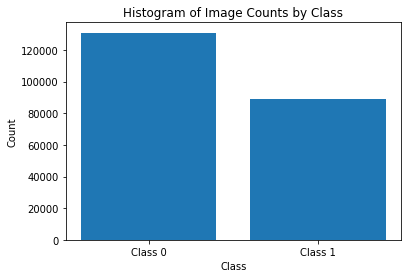

Class 0:  130908
Class 1:  89117


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file with the image filenames and labels
labels_df = pd.read_csv('train_labels.csv')

# Get the counts of each class
class_0_count = labels_df[labels_df['label'] == 0]['label'].count()
class_1_count = labels_df[labels_df['label'] == 1]['label'].count()

# Plot the histogram
plt.bar(['Class 0', 'Class 1'], [class_0_count, class_1_count])
plt.title('Histogram of Image Counts by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Class 0: ", class_0_count)
print("Class 1: ", class_1_count)

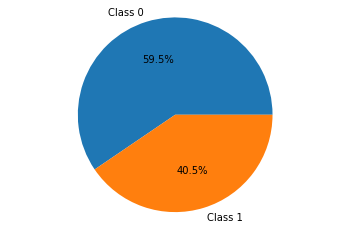

In [17]:
import matplotlib.pyplot as plt

labels = ['Class 0', 'Class 1']
sizes = [labels_df['label'].value_counts()[0], labels_df['label'].value_counts()[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


In [18]:
import cv2
import pandas as pd

dataset_path = '/content'
train_labels = pd.read_csv(os.path.join(dataset_path, 'train_labels.csv'))

for i, row in train_labels.iterrows():
    if i == 10:
        break
    img_name = row['id'] + '.tif'
    label = row['label']
    img_path = os.path.join(dataset_path, 'train', img_name)
    image = cv2.imread(img_path)
    if image is not None:
        print(f'Image shape: {image.shape}, Label: {label}')


Image shape: (96, 96, 3), Label: 0
Image shape: (96, 96, 3), Label: 1
Image shape: (96, 96, 3), Label: 0
Image shape: (96, 96, 3), Label: 0
Image shape: (96, 96, 3), Label: 0
Image shape: (96, 96, 3), Label: 0
Image shape: (96, 96, 3), Label: 1
Image shape: (96, 96, 3), Label: 1
Image shape: (96, 96, 3), Label: 0
Image shape: (96, 96, 3), Label: 0


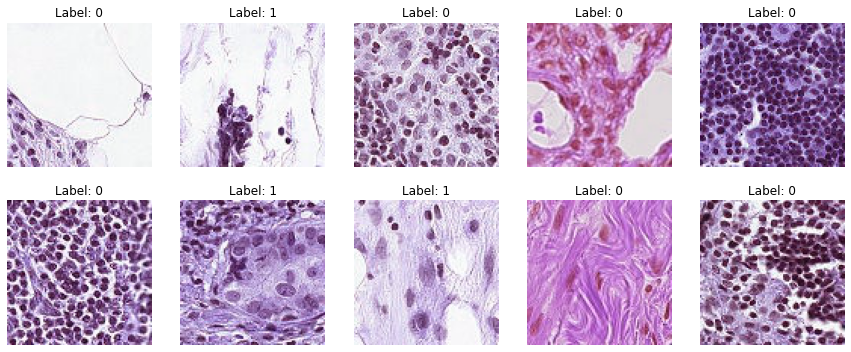

In [19]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = '/content'
train_labels = pd.read_csv(os.path.join(dataset_path, 'train_labels.csv'))

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.ravel()

for i, row in train_labels.head(10).iterrows():
    img_name = row['id'] + '.tif'
    label = row['label']
    img_path = os.path.join(dataset_path, 'train', img_name)
    image = cv2.imread(img_path)
    if image is not None:
        axes[i].imshow(image)
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')


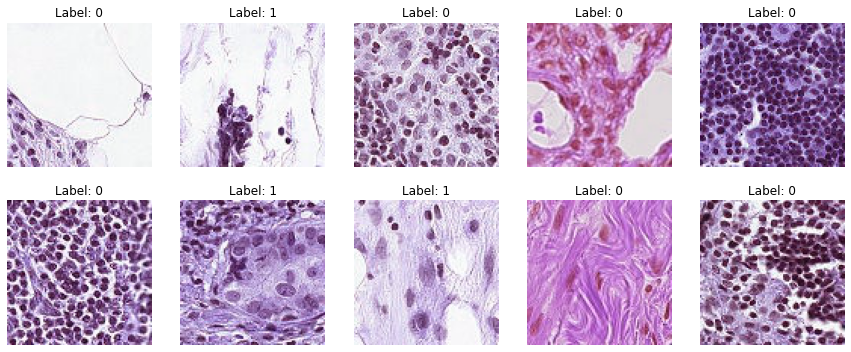

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

dataset_path = '/content'
train_labels = pd.read_csv(os.path.join(dataset_path, 'train_labels.csv'))
valid_image_ids = []

for img_id in train_labels['id']:
    img_path = os.path.join(dataset_path, 'train', img_id+'.tif')
    if os.path.exists(img_path):
        valid_image_ids.append(img_id)

valid_train_labels = train_labels[train_labels['id'].isin(valid_image_ids)]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.ravel()

for i, row in valid_train_labels.head(10).iterrows():
    img_name = row['id'] + '.tif'
    label = row['label']
    img_path = os.path.join(dataset_path, 'train', img_name)
    image = cv2.imread(img_path)
    if image is not None:
        axes[i % 10].imshow(image)
        axes[i % 10].set_title(f'Label: {label}')
        axes[i % 10].axis('off')


In [21]:
import pandas as pd

train_labels['label'] = train_labels['label'].astype(str)


In [22]:
#Create Subfolder

import os
import shutil

# path to the train folder
train_folder = "./train"

# path to the test folder
test_folder = "./test"

# create the subdirectories for the train folder
for i in range(2):
    subdirectory = os.path.join(train_folder, str(i))
    os.makedirs(subdirectory, exist_ok=True)

# move the images into the corresponding subdirectories in the train folder
with open('./train_labels.csv', 'r') as f:
    next(f)
    for line in f:
        filename, label = line.strip().split(',')
        label = int(label)
        src = os.path.join(train_folder, filename + ".tif")
        dst = os.path.join(train_folder, str(label), filename + ".tif")
        shutil.move(src, dst)

# create the subdirectories for the test folder
for i in range(2):
    subdirectory = os.path.join(test_folder, str(i))
    os.makedirs(subdirectory, exist_ok=True)

# move the images into the corresponding subdirectories in the test folder
with open('./sample_submission.csv', 'r') as f:
    next(f)
    for line in f:
        filename = line.strip().split(',')[0]
        src = os.path.join(test_folder, filename + ".tif")
        dst = os.path.join(test_folder, "0", filename + ".tif")
        shutil.move(src, dst)


**Data Augmentation:** ImageDataGenerator is a powerful tool in deep learning that allows for dynamic and efficient data augmentation during training of convolutional neural networks. With ImageDataGenerator, one can perform on-the-fly transformations such as rotation, flipping, zooming, shearing, rescaling, and normalization on the input images. These transformations help to increase the variability of the training dataset, leading to better generalization and improved performance of the model. Additionally, ImageDataGenerator can handle large datasets that cannot fit into memory by loading only the required batch size during each training iteration, thus allowing for faster and more efficient model training.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "./train"
test_dir = "./test"

# define data generators for train and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# set batch size
#batch_size = 64

# set target size for images
#target_size = (96, 96)


train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=256,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=256,
    class_mode='binary',
    subset='validation'
)


Found 176021 images belonging to 2 classes.
Found 44004 images belonging to 2 classes.


**Model Architecture**: Model architecture refers to the design and structure of a machine learning model. In the context of image classification, a variety of pre-built architectures have been developed for deep learning, which can be fine-tuned for specific tasks. For the Histopathologic Cancer Detection problem, I will start with a simple CNN model, and gradually move to more complex models such as the VGG16, VGG19 and ResNet50 models. These models use different combinations of convolutional, pooling, and dense layers to extract meaningful features from the input images. By evaluating the performance of these models, can determine the most effective architecture for our specific task.

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import History 

# Define the model architecture
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history1 = model1.fit(train_gen, epochs=10, validation_data=val_gen)


Epoch 1/10
688/688 [==============================] - 310s 435ms/step - loss: 0.5030 - accuracy: 0.7735 - val_loss: 0.4275 - val_accuracy: 0.8089
Epoch 2/10
688/688 [==============================] - 265s 385ms/step - loss: 0.4281 - accuracy: 0.8070 - val_loss: 0.4157 - val_accuracy: 0.8179
Epoch 3/10
688/688 [==============================] - 256s 372ms/step - loss: 0.4071 - accuracy: 0.8194 - val_loss: 0.4004 - val_accuracy: 0.8270
Epoch 4/10
688/688 [==============================] - 262s 381ms/step - loss: 0.3909 - accuracy: 0.8288 - val_loss: 0.4138 - val_accuracy: 0.8200
Epoch 5/10
688/688 [==============================] - 258s 375ms/step - loss: 0.3758 - accuracy: 0.8365 - val_loss: 0.4020 - val_accuracy: 0.8204
Epoch 6/10
688/688 [==============================] - 251s 365ms/step - loss: 0.3662 - accuracy: 0.8417 - val_loss: 0.4352 - val_accuracy: 0.8008
Epoch 7/10
688/688 [==============================] - 288s 419ms/step - loss: 0.3554 - accuracy: 0.8474 - val_loss: 0.3957 -

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 70688)             0         
                                                                 
 dense (Dense)               (None, 1)                 70689     
                                                                 
Total params: 71,585
Trainable params: 71,585
Non-trainable params: 0
_________________________________________________________________


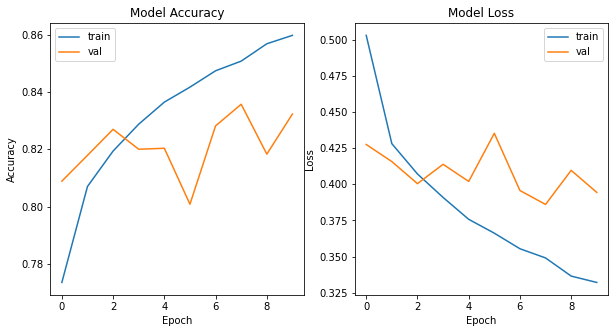

In [26]:
import matplotlib.pyplot as plt

# create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot accuracy and validation accuracy on the first subplot
ax1.plot(history1.history['accuracy'])
ax1.plot(history1.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'val'], loc='upper left')

# plot loss and validation loss on the second subplot
ax2.plot(history1.history['loss'])
ax2.plot(history1.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'val'], loc='upper right')

# show the plot
plt.show()


In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(96, 96),
    batch_size=256,
    class_mode=None,
    shuffle=False
)


Found 57458 images belonging to 2 classes.


The Simple Convolutional Neural Network (CNN) is a basic architecture used for image classification. In this project, the Simple CNN produced an accuracy of 0.86 at the last epoch with a loss of 0.33. However, its validation accuracy is only 0.83 with a loss of 0.39, indicating that it may be overfitting to the training data.

To improve the performance of the model, we need to add regularization techniques like Dropout to prevent overfitting. Dropout is a regularization technique that helps to prevent overfitting in neural networks by randomly dropping out nodes during training. This technique encourages the network to learn more robust features and generalize better to new data.

Therefore, I decided to create another CNN model based on the Simple CNN architecture but with Dropout layers added to reduce overfitting. This improved model can lead to better performance and more accurate predictions in identifying cancerous tissue in histopathologic images.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# define the model architecture
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(train_gen, epochs=10, validation_data=val_gen)


Epoch 1/10
688/688 [==============================] - 293s 418ms/step - loss: 0.4535 - accuracy: 0.7919 - val_loss: 0.3762 - val_accuracy: 0.8377
Epoch 2/10
688/688 [==============================] - 284s 413ms/step - loss: 0.3756 - accuracy: 0.8370 - val_loss: 0.3593 - val_accuracy: 0.8446
Epoch 3/10
688/688 [==============================] - 270s 393ms/step - loss: 0.3211 - accuracy: 0.8661 - val_loss: 0.3020 - val_accuracy: 0.8730
Epoch 4/10
688/688 [==============================] - 264s 384ms/step - loss: 0.2867 - accuracy: 0.8820 - val_loss: 0.2678 - val_accuracy: 0.8897
Epoch 5/10
688/688 [==============================] - 263s 383ms/step - loss: 0.2638 - accuracy: 0.8930 - val_loss: 0.2573 - val_accuracy: 0.8949
Epoch 6/10
688/688 [==============================] - 294s 427ms/step - loss: 0.2421 - accuracy: 0.9033 - val_loss: 0.2453 - val_accuracy: 0.9020
Epoch 7/10
688/688 [==============================] - 272s 396ms/step - loss: 0.2251 - accuracy: 0.9108 - val_loss: 0.2311 -

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 128)     

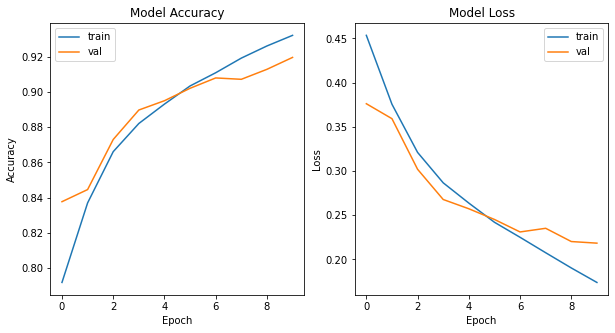

In [30]:
import matplotlib.pyplot as plt

# create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot accuracy and validation accuracy on the first subplot
ax1.plot(history2.history['accuracy'])
ax1.plot(history2.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'val'], loc='upper left')

# plot loss and validation loss on the second subplot
ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'val'], loc='upper right')

# show the plot
plt.show()


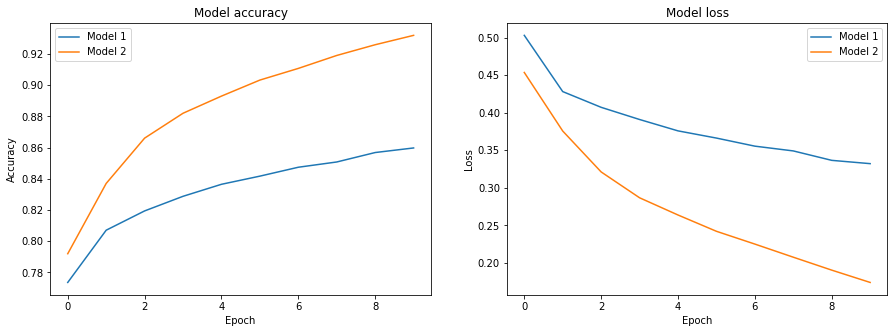

In [31]:
import matplotlib.pyplot as plt

# plot the accuracy
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
#plt.plot(historyVGG16.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2'], loc='upper left')

# plot the loss
plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
#plt.plot(historyVGG16.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2'], loc='upper right')

plt.show()

After creating another CNN model and adding dropout, the model's performance improved significantly. The accuracy rate increased from 0.86 to 0.92, and the loss rate decreased from 0.48 to 0.18 at the last epoch. The validation accuracy also increased from 0.83 to 0.92, with a slight increase in loss from 0.39 to 0.21. This shows that the addition of dropout helped to prevent overfitting and improved the model's ability to generalize to new data, resulting in better overall performance.

In [33]:
from sklearn.metrics import classification_report
import numpy as np

# Classification Report for model1 and model2
model1_predictions=model1.predict(test_gen)
model1_predict_labels=(model1_predictions > 0.5).astype(int)
model1_true_labels=test_gen.classes
model1_report=classification_report(model1_true_labels, model1_predict_labels)
print('Model1 Classification Report:\n', model1_report)

model2_predictions=model2.predict(test_gen)
model2_predict_labels=(model2_predictions > 0.5).astype(int)
model2_true_labels=test_gen.classes
model2_report=classification_report(model2_true_labels, model2_predict_labels)
print('Model2 Classification Report:\n', model2_report)

225/225 [==============================] - 37s 164ms/step
Model1 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     57458
           1       0.00      0.00      0.00         0

    accuracy                           0.69     57458
   macro avg       0.50      0.34      0.41     57458
weighted avg       1.00      0.69      0.82     57458



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


225/225 [==============================] - 37s 165ms/step
Model2 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79     57458
           1       0.00      0.00      0.00         0

    accuracy                           0.65     57458
   macro avg       0.50      0.33      0.40     57458
weighted avg       1.00      0.65      0.79     57458



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import pandas as pd
import numpy as np

# Load test data
test_data = pd.read_csv('sample_submission.csv')

# Make predictions using model1 and model2
#predictions1 = model1.predict(test_data)
#predictions2 = model2.predict(test_data)

# Reshape the prediction arrays to make sure they have the same shape
predictions1 = model1_predictions.reshape(-1, 1)
predictions2 = model2_predictions.reshape(-1, 1)

# Compute the average of the two sets of predictions
combined_predictions = np.mean([model1_predictions, model2_predictions], axis=0)

# Flatten the combined predictions to create a 1-dimensional array
combined_predictions = combined_predictions.flatten()

# Create a submission DataFrame with the combined predictions
submission = pd.DataFrame({'id': test_data['id'], 'target': combined_predictions})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


In [39]:
!kaggle competitions submit -c histopathologic-cancer-detection -f submission.csv -m "submission for model1 and model2"
#!kaggle competitions submit -c histopathologic-cancer-detection -f submission2.csv -m "<submission-message-for-model2>"


100% 2.85M/2.85M [00:01<00:00, 1.54MB/s]
Successfully submitted to Histopathologic Cancer Detection

 The classification report provides information on the precision, recall, and F1 scores for each model. Precision is the number of true positives divided by the total number of predicted positives, while recall is the number of true positives divided by the total number of actual positives. The F1 score is the harmonic mean of precision and recall.

Based on the classification report for model 1 and model 2, both models have perfect precision at 1.0, indicating that all the predictions for positive class are correct. However, the recall score for both models is 0.69 and 0.65 respectively, indicating that they were not able to correctly identify all of the positive cases. However, both models have similar F1 scores of 0.82 and 0.79, which is the weighted average of the precision and recall. Overall, further tuning and optimization may be necessary to improve the model's performance.

I will continue to create another three different pre-trained models which is VGG16, VGG19 and ResNet50 in my next two separate notebooks.